# Creating a Deep Neural Network for Logistic Regression




#### Created by: Steven J. Ahlberg
#### IBM Advanced Data Science Capstone
#### September 19, 2021

# Video Game Sales as of December, 2016
## I. Initial Exploratory Data Analysis
### a. Identify quality issues (e.g. missing values, wrong measurements, etc.)

In [1]:
# Import some standard libraries and the dataset
import pandas as pd
import numpy as np

df1 = pd.read_csv(r'C:\Users\sjahl\source\repos\ibm-AdvDataScience-capstone\video_games_sales_2016.csv')
df1.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# Check the dataframe information
print('df1: {} x {}'.format(df1.shape[0], df1.shape[1]))
df1.info()

df1: 16719 x 16
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.

In [3]:
# Missing values summary
print('Missing Value Summary\n{}'.format('-'*23))
print(df1.isna().sum(axis=0))

Missing Value Summary
-----------------------
Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
dtype: int64


#### Clean the Data

Because of the large amount of missing data (roughly half of the number of records are incomplete), imputation would not be an effective method for filling in the gaps and would throw off our accuracy for predictability. So, I am going to drop the incomplete records and still be able to work with a good sizable dataset that is complete.

In [4]:
# Create the workable subset of data (df2)
df2 = pd.DataFrame(df1.dropna())
df2 = df2.reset_index(drop=True)
print('Missing Value Summary\n{}'.format('-'*23))
print(df2.isna().sum(axis=0))

Missing Value Summary
-----------------------
Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64


In [5]:
# Check the sub-dataframe information
print('df2: {} x {}'.format(df2.shape[0], df2.shape[1]))
df2.info()

df2: 6825 x 16
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6825 entries, 0 to 6824
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   float64
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   float64
 12  User_Score       6825 non-null   float64
 13  User_Count       6825 non-null   float64
 14  Developer        6825 non-null   object 
 15  Rating           6825 non-null   object 
dtypes: float64(10), object(6)
memory usage: 853.2

In [6]:
# Take a look at what the dataset looks like for reference
df2.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
2,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
3,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
4,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


### b. Assess feature quality – how relevant is a certain measurement (correlation matrix)
Now, in order to perform a correlation matrix, and do other calculations with the data, I will use scikit-learn's preprocessing OrdinalEncoder function with fit_transform to transform categorical features to numeric values, and change column headings back over to labels for easy reference.

I will use seaborn and matplotlib.pyplot for visualizing the data for correlation and statistics.

In [7]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

df3 = pd.DataFrame(enc.fit_transform(df2[['Name','Platform','Genre','Publisher','Developer','Rating']]), \
                 columns=df2[['Name','Platform','Genre','Publisher','Developer','Rating']].columns)
df3.head()

,Name,Platform,Genre,Publisher,Developer,Rating
0,4215.0,12.0,10.0,160.0,771.0,1.0
1,2087.0,12.0,6.0,160.0,771.0,1.0
2,4217.0,12.0,10.0,160.0,771.0,1.0
3,2567.0,2.0,4.0,160.0,771.0,1.0
4,4213.0,12.0,3.0,160.0,771.0,1.0


In [8]:
df4 = df2.drop(['Name','Platform','Genre','Publisher','Developer','Rating'], axis=1)
df = pd.concat([df3, df4], axis=1)
df.head()

,Name,Platform,Genre,Publisher,Developer,Rating,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,4215.0,12.0,10.0,160.0,771.0,1.0,2006.0,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0
1,2087.0,12.0,6.0,160.0,771.0,1.0,2008.0,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0
2,4217.0,12.0,10.0,160.0,771.0,1.0,2009.0,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0
3,2567.0,2.0,4.0,160.0,771.0,1.0,2006.0,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0
4,4213.0,12.0,3.0,160.0,771.0,1.0,2006.0,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6825 entries, 0 to 6824
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   float64
 1   Platform         6825 non-null   float64
 2   Genre            6825 non-null   float64
 3   Publisher        6825 non-null   float64
 4   Developer        6825 non-null   float64
 5   Rating           6825 non-null   float64
 6   Year_of_Release  6825 non-null   float64
 7   NA_Sales         6825 non-null   float64
 8   EU_Sales         6825 non-null   float64
 9   JP_Sales         6825 non-null   float64
 10  Other_Sales      6825 non-null   float64
 11  Global_Sales     6825 non-null   float64
 12  Critic_Score     6825 non-null   float64
 13  Critic_Count     6825 non-null   float64
 14  User_Score       6825 non-null   float64
 15  User_Count       6825 non-null   float64
dtypes: float64(16)
memory usage: 853.2 KB


In [10]:
import seaborn as sns
from IPython.display import Image
import matplotlib.pyplot as plt

plt.style.use('seaborn')
%matplotlib inline

sns.set(color_codes=True)

Text(0.5, 1.0, 'Correlation Heatmap')

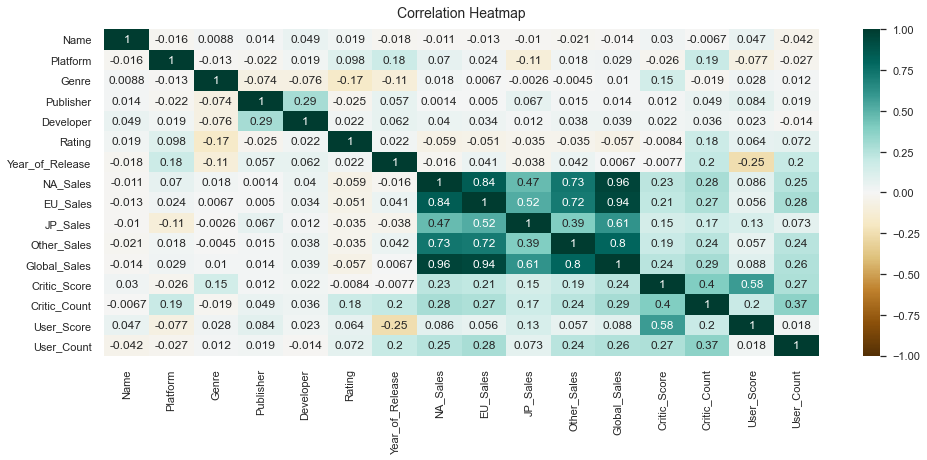

In [11]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12)

### c. Get an idea on the value distribution of your data using statistical measures and visualizations
From the correlation matrix, regional sales data correlates strongly to one another except in the Japanese market. That could be information that would require exploratory analysis as to why.

As correlation analysis pertains to categorical features: critic score, critic count, and user count have the strongest correlation. However, it is noted that although the word 'strongest', as it used in comparison with other measures, still holds a weak correlation between sales data (ignoring the Japanese Market).

Furthermore, user score shows a very weak correlation to sales which is remarkable, in my opinion. That was against my hypothesis. There are also weak correlations between everything else, including developer and rating which surprises me.

So, for now, I will be focused on comparison data and statistics using regional sales, and categorical features: critic score, critic count, and user count. I will use relational scatter plots to how variables in a dataset relate to each other and how those relationships depend on other variables. I will also use a boxen plot chart to show statics.

In [12]:
# Reassign the categorical values to column features
Z = pd.DataFrame(enc.inverse_transform(df3), \
                 columns=df3[['Name','Platform','Genre','Publisher','Developer','Rating']].columns)
df4 = df2.drop(['Name','Platform','Genre','Publisher','Developer','Rating'], axis=1)
df = pd.concat([Z, df4], axis=1)
df.head()

,Name,Platform,Genre,Publisher,Developer,Rating,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,Wii Sports,Wii,Sports,Nintendo,Nintendo,E,2006.0,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0
1,Mario Kart Wii,Wii,Racing,Nintendo,Nintendo,E,2008.0,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0
2,Wii Sports Resort,Wii,Sports,Nintendo,Nintendo,E,2009.0,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0
3,New Super Mario Bros.,DS,Platform,Nintendo,Nintendo,E,2006.0,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0
4,Wii Play,Wii,Misc,Nintendo,Nintendo,E,2006.0,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0


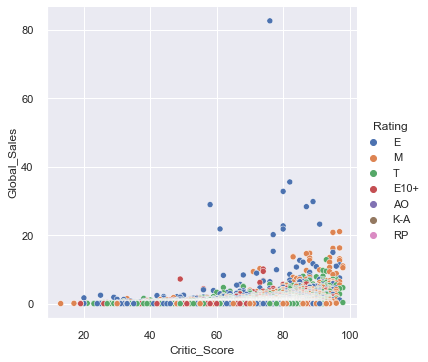

In [13]:
# Scatter plot for relational diagram
sns.relplot(x='Critic_Score', y='Global_Sales', hue='Rating', data=df)

Games with a medium-high critic score with a rating of 'E' for Everyone was an outlier, but hypothesis testing proves accurate showing that games with a rating of 'E' for Everyone have the highest global sales. Second behind that, it appears rating 'M' for Mature games holds strong posture amongst critic scores and global sales.

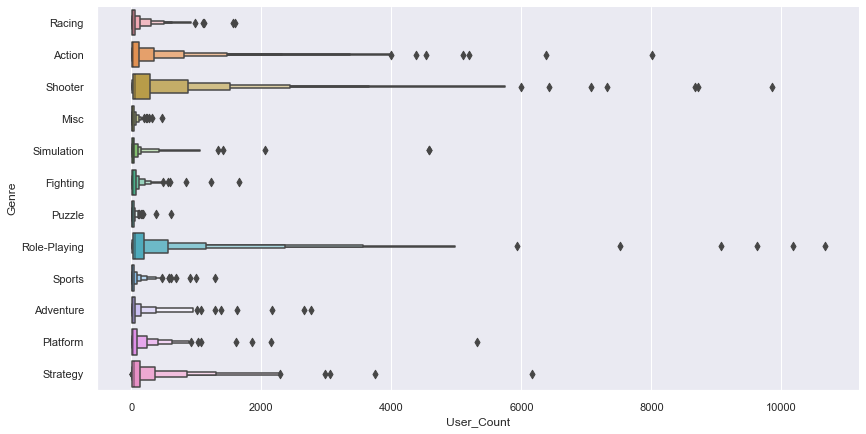

In [14]:
# User count distribution for games with respect to genre
sns.catplot(x='User_Count', y='Genre', kind='boxen', data=df.sort_values('User_Count'), height=6, aspect=2)

Here we see the most popular games in terms of user count with respect to genre. Action, shooter, and role-playing (or combination thereof) rank the highest. Note that this does not correlate with user score.

What we used here is called a boxen plot. The reason is that while conventional boxplots are useful displays for conveying rough information about the central 50% and the extent of data, the information provided by boxplots is appropriately somewhat vague beyond the quartiles, and the expected number of outliers of size n is often less than 10. Larger data sets (n ~ 10,000-100,000) afford more precise estimates of quantiles beyond the quartiles, but conventional boxplots do not show this information about the tails, and, in addition, show large numbers of extreme, but not unexpected, observations.

The boxen plot addresses both these shortcomings:
(1) it conveys more detailed information in the tails using boxes, but only to the depths where the boxed values are reliable estimates of their corresponding quantiles and
(2) outliers are labeled as those observations beyond the most extreme boxed value.

Here we see that there is a lot of popularity from users in 'shooter' and 'role-playing' games. Games that combine these together would be almost certainly popular. With these genres, we also see strategy and action are also high in popularity. Again, games with a combination of these genres seem to be the most popular among user count; however, that doesn't seem to necessarily correlate with sales revenue.

Now, we'll inspect the data showing statistical information among the numerical features

In [15]:
# Show statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,6825.0,2007.436777,4.211248,1985.00,2004.00,2007.00,2011.00,2016.00
NA_Sales,6825.0,0.394484,0.967385,0.00,0.06,0.15,0.39,41.36
EU_Sales,6825.0,0.236089,0.687330,0.00,0.02,0.06,0.21,28.96
JP_Sales,6825.0,0.064158,0.287570,0.00,0.00,0.00,0.01,6.50
Other_Sales,6825.0,0.082677,0.269871,0.00,0.01,0.02,0.07,10.57
Global_Sales,6825.0,0.777590,1.963443,0.01,0.11,0.29,0.75,82.53
Critic_Score,6825.0,70.272088,13.868572,13.00,62.00,72.00,80.00,98.00
Critic_Count,6825.0,28.931136,19.224165,3.00,14.00,25.00,39.00,113.00
User_Score,6825.0,7.185626,1.439942,0.50,6.50,7.50,8.20,9.60
User_Count,6825.0,174.722344,587.428538,4.00,11.00,27.00,89.00,10665.00


In [16]:
# Use pd.qcut() to bin the data by num_streams and create a pivot table
# Group by rank for critic score with respect to global sales
rank_labels = ['Poor', 'Noticable', 'Respectful', 'Honorable', 'Elite']
df['cScore_Rank_bins'] = pd.qcut(df['Critic_Score'], q=5, labels=rank_labels)
df['cCount_Rank_bins'] = pd.qcut(df['Critic_Count'], q=5, labels=rank_labels)
df['uCount_Rank_bins'] = pd.qcut(df['User_Count'], q=5, labels=rank_labels)

In [17]:
# Do some data aggregation with pivot tables
# Rank Platforms in terms of global sales
cols_to_show = ['NA_Sales', 'Global_Sales']
plat_pvt = pd.pivot_table(df, index=['Platform'], values=cols_to_show).round(3)
sort_plat = plat_pvt.sort_values(by='Global_Sales', ascending=False)
sort_plat

,Global_Sales,NA_Sales
Platform,,
PS,1.377,0.612
Wii,1.376,0.716
PS3,1.020,0.444
PS4,1.017,0.352
X360,0.995,0.622
PS2,0.830,0.415
DS,0.824,0.374
XOne,0.815,0.475
3DS,0.795,0.314


In [18]:
# Rank Publishers in terms of global sales
pub_pvt = pd.pivot_table(df, index=['Publisher'], values=cols_to_show).round(3)
sort_pub = pub_pvt.sort_values(by='Global_Sales', ascending=False)
sort_pub.head(20)

,Global_Sales,NA_Sales
Publisher,,
Nintendo,2.919,1.276
GT Interactive,2.833,1.470
SquareSoft,2.764,0.897
RedOctane,2.170,1.610
Hello Games,1.700,0.630
Valve,1.700,0.830
Bethesda Softworks,1.539,0.752
Microsoft Game Studios,1.535,0.985
Sony Computer Entertainment Europe,1.528,0.655


In [19]:
# Do some group filtering and aggregate some pivot table data for genre and rating
dfgroup = df[df.Platform.isin(['PS','Wii','PS3','PS4','X360','PS2','DS','XOne'])]
grp = dfgroup[['cScore_Rank_bins','Platform','Genre','Rating','Global_Sales']]
grp = grp.pivot_table(index=['Rating','Genre'], columns='cScore_Rank_bins', aggfunc='sum')
grp

Global_Sales                                       
cScore_Rank_bins            Poor Noticable Respectful Honorable   Elite
Rating Genre                                                           
E      Action              11.58     14.49      15.74     17.87   26.74
       Adventure            2.06      4.33       2.45      1.22    0.21
       Fighting             0.32      0.02       0.00      0.00    0.00
       Misc                56.84     59.97      34.56     31.14    7.19
       Platform            11.71     18.71      23.20     16.47  117.89
       Puzzle               3.57      4.13       5.19     18.40   12.02
       Racing              19.99     19.78      14.44     73.36  130.27
       Role-Playing         4.25     11.06       1.87      6.12   14.37
       Shooter              0.03      0.14       0.11      0.92    0.15
       Simulation           5.51     24.01      16.92      6.54   17.60
       Sports              23.70     37.82     119.43    207.67  226.73
       Strategy             3.53      2.09       0.52      1.00    0.39
E10+   Action              11.76     21.29      40.14     47.48   12.07
       Adventure            1.99      2.47       0.07      0.43    0.00
       Fighting             0.75      1.55       0.26      0.00    0.00
       Misc                17.30      6.95      45.84      8.98    0.48
       Platform             9.87      9.46       2.18      5.08    8.54
       Puzzle               0.10      0.13       2.55      4.08   12.79
       Racing               1.98      6.89       9.33      7.87   12.30
       Role-Playing         2.42      4.51       8.02     10.14   14.82
       Shooter              0.49      3.79       1.92      1.19    4.30
       Simulation           2.35      3.09       6.36      0.19    1.21
       Sports               3.44      6.39      13.22      9.18   12.18
       Strategy             0.20      1.01       1.64      2.93    2.07
K-A    Action               0.00      0.00       0.00      0.00    0.00
       Adventure            0.00      0.00       0.00      0.00    0.00
       Fighting             0.00      0.00       0.00      0.00    0.00
       Misc                 0.00      0.00       0.00      0.00    1.92
       Platform             0.00      0.00       0.00      0.00    0.00
       Puzzle               0.00      0.00       0.00      0.00    0.00
       Racing               0.00      0.00       0.00      0.00    0.00
       Role-Playing         0.00      0.00       0.00      0.00    0.00
       Shooter              0.00      0.00       0.00      0.00    0.00
       Simulation           0.00      0.00       0.00      0.00    0.00
       Sports               0.00      0.00       0.00      0.00    0.00
       Strategy             0.00      0.00       0.00      0.00    0.00
M      Action              22.32     24.00      65.22     69.23  332.97
       Adventure            1.79      2.20       3.28     15.02   13.88
       Fighting             2.11      0.91       2.64      4.37   13.22
       Misc                 0.51      0.00       0.00      0.00    0.79
       Platform             0.00      0.00       1.60      0.00    0.00
       Puzzle               0.00      0.00       0.00      0.00    0.00
       Racing               1.96      0.28       0.00      0.00    1.41
       Role-Playing         2.83      5.86       3.03     17.60   88.79
       Shooter             17.83     21.68      73.30     85.75  328.05
       Simulation           0.20      0.00       0.62      0.41    0.00
       Sports               0.40      0.26       0.89      0.00    0.00
       Strategy             0.43      0.00       0.37      0.00    1.19
T      Action              46.19     48.12      44.60     34.60   83.70
       Adventure            1.64      2.16       1.51      3.56    0.48
       Fighting            11.88     14.58      37.45     33.44   77.63
       Misc                 2.86      3.17      15.17     17.82   54.57
       Platform             2.13      2.29       0.67      2

In [20]:
# See how regional sales data stack up against each other in respect to Critic Score
sales = ['Global_Sales','NA_Sales','EU_Sales','JP_Sales','Other_Sales']
nat_pvt = df.pivot_table(index='cScore_Rank_bins', values=sales, aggfunc='sum')
nat_sort = nat_pvt.sort_values(by='Global_Sales', ascending=False)
nat_sort

,EU_Sales,Global_Sales,JP_Sales,NA_Sales,Other_Sales
cScore_Rank_bins,,,,,
Elite,702.83,2288.40,194.28,1140.75,250.48
Honorable,339.20,1081.94,97.18,530.80,114.55
Respectful,276.65,910.57,69.09,470.91,93.64
Noticable,169.22,593.26,51.23,310.56,61.76
Poor,123.41,432.88,26.10,239.33,43.84


<AxesSubplot:>

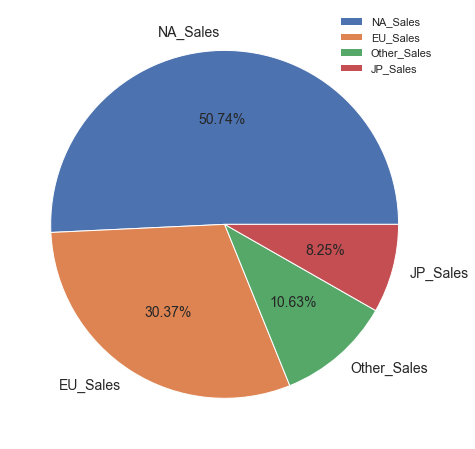

In [21]:
# Visualize how the regional sales compare to each other overall
nats = df.filter(items=['NA_Sales','EU_Sales','JP_Sales','Other_Sales'])
natsum = nats.sum(axis=0)
natsort = natsum.sort_values(ascending=False)
natsort.plot.pie(figsize=(8, 8), ylabel='', legend=True, autopct="%.2f%%", fontsize=14)

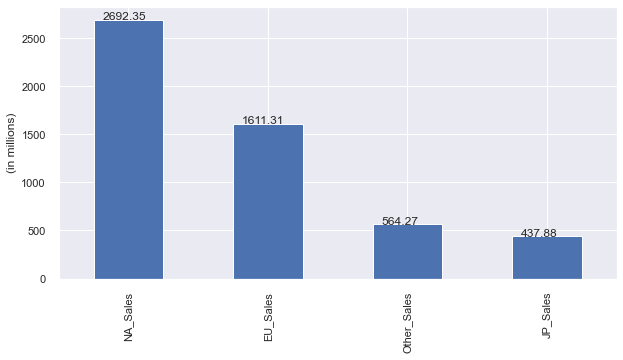

In [22]:
# Get detailed sales figures for regional summations
ax = natsort.plot.bar(ylabel='(in millions)', figsize=(10,5))
for p in ax.patches:
    ax.annotate(str(np.round(p.get_height(),decimals=2)), (p.get_x()+p.get_width()/8, p.get_height()))

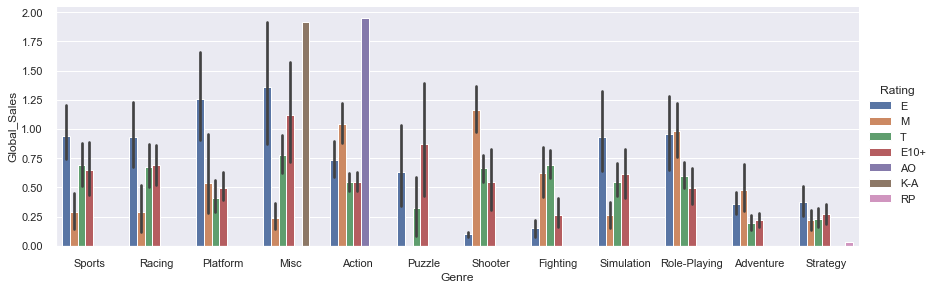

In [23]:
# Global Sales visual representation comparing genres and rating
sns.catplot(x='Genre', y='Global_Sales', hue='Rating', kind='bar', data=df, height=4, aspect=3)

Here, we see that in action, the 'AO' rating for 'Adults Only' (Ages 18+) holds the most sales by far in the 'Action' genre. 'Mature' holds the highest sales in the 'Shooter' genre, as one would expect, but also tops in 'Adventure' and 'Role Playing' somewhat surprisingly. The other genres are pretty much dominated by 'E' for 'Everyone', which replaced 'K-A' or 'Kids-Adult' in 1998.

In summary, we see that the Playstation, Wii, and Xbox (familiar platforms that are well established) top the list of gaming platforms for sales of video games. The most popular genres bringing in the most sales are action games that could be also be subcategorized as sports, racing, simulation, and role-playing or any combination there-of. We saw that the features most strongly correlated with global sales is Critic count, Critic score, and User count. Although the correlation was relatively weak, there wasn't any other features that could be directly correlated with sales figures (regional or global). Japanese sales also were not correlated with any other regional sales data, which begs the question as to why. Wii, manufactured by Nintendo, is a Japanese company. So, it would be interesting to know why sales aren't really big there.

## II. Build, Train, Test, Evaluate Models
### a. Gradient Boosting Regression Non-DeepLearning Algorithm

In [24]:
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [25]:
# Seperate the test and target data leaving out Name and geographical sales data
dataset = pd.concat([df3, df4], axis=1)
target = pd.DataFrame(dataset['Global_Sales'])
data = dataset.filter(items=['Platform','Genre','Publisher','Developer','Rating','Year_of_Release',
                             'Critic_Score','Critic_Count','User_Score','User_Count'])
print('data set shape:', data.shape)
print('target set shape:', target.shape)

data set shape: (6825, 10)
target set shape: (6825, 1)


In [26]:
# Seperate the data into training and test datasets with a 90/10 split ratio
X, y = data, target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

params = {'loss': 'ls',
          'learning_rate': 0.01,
          'n_estimators': 500,
          'max_depth': 5,
          'min_samples_split': 5}

In [27]:
# Now, let's initiate the gradient boosting regressors and fit it with our training data
# Let’s also look and the mean squared error on the test data
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train.values.ravel())
mse = mean_squared_error(y_test, reg.predict(X_test))

print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 0.7666


MSE is calculated by the sum of square of prediction error which is real output minus predicted output and then divide by the number of data points. It gives you an absolute number on how much your predicted results deviate from the actual number. You cannot interpret many insights from one single result but it gives you a real number to compare against other model results and help you select the best regression model. Initially, though, I feel this is pretty good.

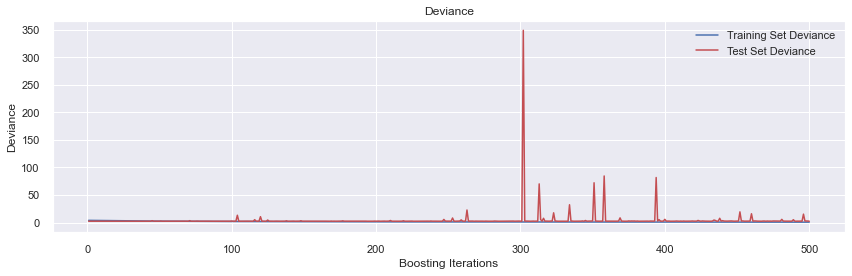

In [28]:
# To visualize the results, I will first compute the test set deviance and then plot it against boosting iterations
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = reg.loss_(y_test, y_pred[i])

fig = plt.figure(figsize=(12, 4))
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, reg.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

Text(0.5, 1.0, 'Feature Importance (MDI)')

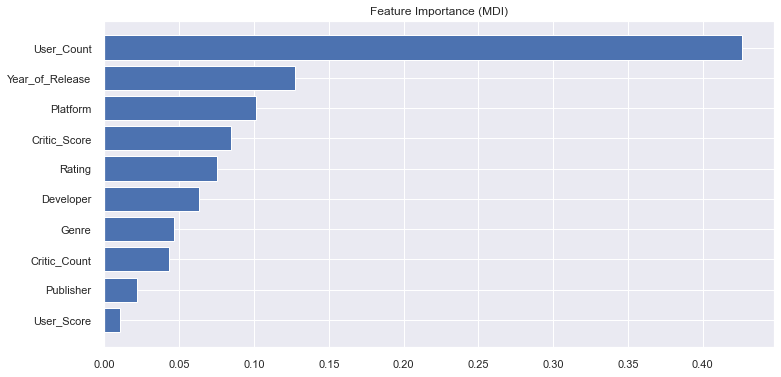

In [29]:
# Rank feature importances
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(data.columns)[sorted_idx])
plt.title('Feature Importance (MDI)')

Impurity-based feature importances can be misleading for high cardinality features (many unique values), such as User_Count. As an alternative, the permutation importances of reg can be computed on a held out test set.

Permutation feature importance is a model inspection technique that can be used for any fitted estimator when the data is tabular. This is especially useful for non-linear or opaque estimators. The permutation feature importance is defined to be the decrease in a model score when a single feature value is randomly shuffled. This procedure breaks the relationship between the feature and the target, thus the drop in the model score is indicative of how much the model depends on the feature. This technique benefits from being model agnostic and can be calculated many times with different permutations of the feature.

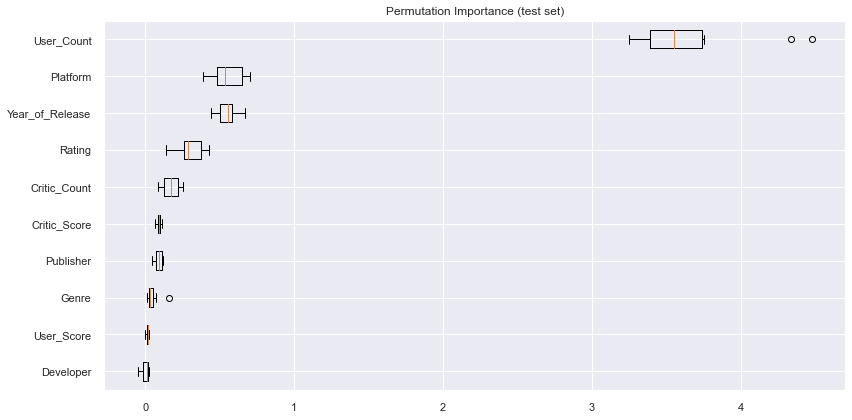

In [30]:
# Rank permutation importances
fig = plt.figure(figsize=(12, 6))
result = permutation_importance(reg, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=np.array(data.columns)[sorted_idx])
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

In [31]:
# See how regional sales data stack up against each other in respect to User Count
sales = ['Global_Sales','NA_Sales','EU_Sales','JP_Sales','Other_Sales']
nat_pvt = df.pivot_table(index='uCount_Rank_bins', values=sales, aggfunc='sum')
nat_sort = nat_pvt.sort_values(by='Global_Sales', ascending=False)
nat_sort

,EU_Sales,Global_Sales,JP_Sales,NA_Sales,Other_Sales
uCount_Rank_bins,,,,,
Elite,851.62,2559.24,221.33,1197.90,288.45
Honorable,341.68,1196.43,116.46,621.59,116.91
Respectful,194.41,709.99,55.07,379.79,80.06
Noticable,123.53,464.69,31.74,265.03,44.21
Poor,100.07,376.70,13.28,228.04,34.64


Text(0, 0.5, 'Aggregate Sales')

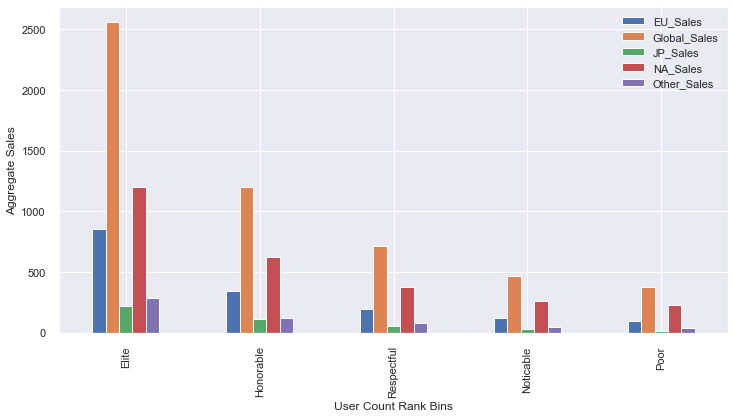

In [32]:
# Show the sales data from the pivot table with repsect to the most important feature
ax = nat_sort.plot(kind='bar')
fig = ax.get_figure()
fig.set_size_inches(12, 6)
ax.set_xlabel('User Count Rank Bins')
ax.set_ylabel('Aggregate Sales')

### b. Deep Learning Model with AutoEncoder

For this data set, I will be creating a supervised learning model using an AutoEncoder. Autoencoders work by automatically encoding data based on input values, performing an activation function, and finally decoding the data for output. A "bottleneck" is imposed on the input features, compressing them into fewer categories. Thus, if some inherent structure exists within the data, the autoencoder model will identify and leverage it to get the output.

The determination for using this is based on its usefulness in identifying features, dimensionality reduction, and feature encoding.

In [33]:
# Import libraries
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, ReLU, BatchNormalization
from tensorflow.keras.utils import plot_model

In [34]:
# Define dataset
X, y = data, target
X, y = make_regression(n_samples=3000, n_features=10, n_informative=4, noise=0.1, random_state=42)

# Number of input columns
n_inputs = X.shape[1]

# Split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Scale data
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)

We will define the encoder to have one hidden layer with the same number of nodes as there are in the input data with batch normalization and ReLU activation.

This is followed by a bottleneck layer with the same number of nodes as columns in the input data, e.g. no compression.

In [35]:
# Define encoder
visible = Input(shape=(n_inputs,))
e = Dense(n_inputs*2)(visible)
e = BatchNormalization()(e)
e = ReLU()(e)

# Define bottleneck
n_bottleneck = n_inputs
bottleneck = Dense(n_bottleneck)(e)

The decoder will be defined with the same structure.

It will have one hidden layer with batch normalization and ReLU activation. The output layer will have the same number of nodes as there are columns in the input data and will use a linear activation function to output numeric values.

The model will be fit using the efficient Adam version of stochastic gradient descent and minimizes the mean squared error, given that reconstruction is a type of multi-output regression problem.

In [36]:
# Define decoder
d = Dense(n_inputs*2)(bottleneck)
d = BatchNormalization()(d)
d = ReLU()(d)

# Output layer
output = Dense(n_inputs, activation='linear')(d)

In [37]:
# Define and compile the autoencoder model
model = Model(inputs=visible, outputs=output)
model.compile(optimizer='adam', loss='mse', metrics='accuracy')

Next, we can train the model to reproduce the input and keep track of the performance of the model on the holdout test set. The model is trained for 60 epochs and a batch size of 15 samples.

In [38]:
# Fit the autoencoder model to reconstruct input
history = model.fit(X_train, X_train, epochs=60, batch_size=15, verbose=1, validation_data=(X_test,X_test))
print(history.history.keys())

Epoch 1/60
180/180 [==============================] - 1s 2ms/step - loss: 0.2248 - accuracy: 0.1559 - val_loss: 0.0512 - val_accuracy: 0.2400
Epoch 2/60
180/180 [==============================] - 0s 959us/step - loss: 0.0478 - accuracy: 0.2063 - val_loss: 0.0293 - val_accuracy: 0.2433
Epoch 3/60
180/180 [==============================] - 0s 909us/step - loss: 0.0284 - accuracy: 0.2822 - val_loss: 0.0219 - val_accuracy: 0.3033
Epoch 4/60
180/180 [==============================] - 0s 942us/step - loss: 0.0211 - accuracy: 0.3189 - val_loss: 0.0182 - val_accuracy: 0.3667
Epoch 5/60
180/180 [==============================] - 0s 980us/step - loss: 0.0177 - accuracy: 0.3478 - val_loss: 0.0151 - val_accuracy: 0.4167
Epoch 6/60
180/180 [==============================] - 0s 950us/step - loss: 0.0154 - accuracy: 0.3815 - val_loss: 0.0134 - val_accuracy: 0.4233
Epoch 7/60
180/180 [==============================] - 0s 976us/step - loss: 0.0137 - accuracy: 0.4215 - val_loss: 0.0122 - val_accuracy: 0

180/180 [==============================] - 0s 847us/step - loss: 0.0028 - accuracy: 0.7459 - val_loss: 6.9906e-04 - val_accuracy: 0.8967
Epoch 58/60
180/180 [==============================] - 0s 857us/step - loss: 0.0028 - accuracy: 0.7463 - val_loss: 5.8567e-04 - val_accuracy: 0.9200
Epoch 59/60
180/180 [==============================] - 0s 879us/step - loss: 0.0028 - accuracy: 0.7311 - val_loss: 5.4860e-04 - val_accuracy: 0.9200
Epoch 60/60
180/180 [==============================] - 0s 900us/step - loss: 0.0027 - accuracy: 0.7381 - val_loss: 5.9983e-04 - val_accuracy: 0.9000
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


After training, we can plot the learning curves for the train and test sets to confirm the model learned the reconstruction problem well.

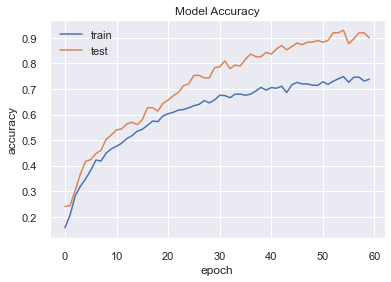

Accuracy: 0.9000


In [39]:
# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print('Accuracy: {:.4f}'.format(history.history['val_accuracy'][59]))

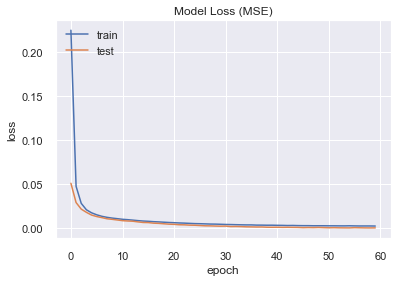

MSE Loss: 0.0006


In [40]:
# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss (MSE)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print('MSE Loss: {:.4f}'.format(history.history['val_loss'][59]))

Upon comparing the two models, we clearly see that the Deep Learning model was far superior in almost completely eliminating the Mean Squared Error. The accuracy on the AutoEncoder model was also high, around 85-90%, but we might want to spend more time experimenting with more options for tuning this a bit more to get the accuracy above 90%. So now, we see that Nintendo leads the way as a Platform for producing video games rated E for Everyone. However, the most popular among users (critically and user acclaimed) are M for Mature, action, shooter, and role-playing games.

Depending on the game you want to develop, you might consider different platforms for the game to be distributed on. The game would have to be compatible with the features of the gaming system and what controls the user would need to have in order to get the most enjoyment out of it. You would also have to consider memory and processing speeds for interactive game-play.

So, while there are many features to consider that aren't listed here for costs and strategy for development, it does provide investors an idea of what to expect based on the catalog of games we have in our pipeline that can be translated to projected sales figures.